# 我校保研情况分析

今天闲着没什么事情，统计了下我校保研学生在`去向学校`，`分数`，`性别`，`使用邮箱`，`自身专业`，`自身学院`上的区别，仅供娱乐。本文代码已经放在了[github](https://github.com/memoiry/Postgraduate-Recommendation-Analysis)，自取。如果有问题，我的邮箱是memoiry@outlook.com。

下面是发现的一些有趣的事实。
- 我校 14 级入学男女比是 $\frac{6509}{2702} = 2.41$，总保研人数比是 $\frac{727}{515} =  1.41$，保研比是 $\frac{727 + 515}{6509 + 2702} = 13.5\%$，男生保研比$\frac{727}{6509} = 11.17\%$, 女生保研比$\frac{515}{2702} = 19.05\%$看来女生比男生更爱学习呀
- 保研人数最多的是材料科学与工程 `76` 人，机械工程 `72` 人，船舶与海洋工程 `51` 人。
- 去向最多的学校是('武汉理工大学', `331` 人), ('华中科技大学', `236` 人), ('武汉大学', `68` 人), ('华南理工大学', `42` 人), ('湖南大学', `42` 人), ('浙江大学', `40` 人)。
- 90%用的是 `qq` 邮箱，然后大部分是 `163` 邮箱，貌似还看到有人用 wutnews，应该是经纬的？
- 硕士有 `1151` 人, 直博生有 `91` 人。

- 分学院来看，平均综测最高的是自动化学院，最好保研的学院是资环学院（平均排名100+），平均绩点最高的依次是外国语，文法，政治学院，见如下结果统计（只计前5）

--- 
|学院|综测平均分数|人数|
|--|--|--|
|自动化学院      |  95.395000   |  70|
|文法学院       |  95.328000   |  35|
|艺术与设计学院  |    95.129737 |    38|
|外国语学院     |   93.661176  |   17|
|管理学院      |   93.350652 |    92|

---

|学院|年级平均排名|人数|
|--|--|--|
|外国语学院     |    26.176471   |  17|
|交通学院      |    39.180723 |    83|
|土木工程与建筑学院 |    42.693548  |   62|
|化学化工与生命科学学院  | 51.057143  |   35|
|机电工程学院    |    52.469027   | 113|

---

|学院|平均 GPA|人数|
|--|--|--|
|外国语学院      |  4.044706  |   17|
|文法学院       |  3.888571  |  35|
|政治与行政学院  |    3.818824  |   17|
|自动化学院      |  3.764714    | 70|
|经济学院       |  3.751698    | 53|
---

- 分录取学校来看，在综测、排名、GPA上的排名如下（只列前五）：

--- 

|保研学校|综测平均分数|人数|
|--|--|--|
|清华大学    |  99.406364   |  11|
|浙江大学  |    98.396000   |  40|
|北京大学  |    97.448750  |    8|
|同济大学  |    97.050667   |  15|
|北京航空航天大学  |96.088125  |   16|

---

|保研学校|年级平均排名|人数|
|--|--|--|
|清华大学      |  8.727273   |  11|
|上海交通大学  |   11.757576  |   33|
|同济大学    |   17.266667   |  15|
|中国科学技术大学  | 20.095238|     21|
|浙江大学    |   24.500000  |   40|

---

|保研学校|平均 GPA|人数|
|--|--|--|
|清华大学    |  4.132727   |  11|
|北京大学    |  4.062500    |  8|
|上海交通大学   | 3.993030  |   33|
|中南财经政法大学  |3.953333 |    12|
|浙江大学   |   3.948500   |  40|

---


如果想看更加详细的结果，可以看看下面的代码与结果，主要四个部分

1. 自动化学院分别在性别，专业，录取学校，硕博类型，邮箱类型上的区别
2. 全校在性别，专业，录取学校，硕博类型，邮箱类型上的区别。
3. 全校分别根据录取学校的不同，综测，排名，GPA上的区别。
4. 全校分别根据学院的不同，综测，排名，GPA上的区别。

这里先导入必要的库，中文与邮箱格式处理


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")
file = 'test.xls'
df = pd.read_excel(file)
plt.rcParams['font.sans-serif'] = ['SimHei']  # for Chinese characters
df['电子邮箱'] = df['电子邮箱'].apply(lambda x: x.split('@')[1].split('.')[0])

定义一个函数进行分类统计

In [2]:
def plot_cat(dataframe, attri, attri2 = None, attri3 = None, prep = None):
    plt.figure(figsize=(15,5))
    print('统计类型：{} '.format(attri))
    if attri2 is not None:
        dataframe = dataframe[dataframe[attri2] == attri3]
    
    types = np.unique(dataframe[attri])
    num_type = len(types)
    stat_num = []
    for i in range(num_type):
        stat_num.append(dataframe[dataframe[attri] == types[i]].shape[0])
    print('类型数：{}'.format(num_type))
    order = np.argsort(stat_num)[::-1]
    print('统计个数排序:{}'.format(list(zip(types[order],np.sort(stat_num)[::-1]))))
    sns.barplot(types, stat_num)
    plt.show()
    print()

## 1. 自动化学院分别在性别，专业，录取学校，硕博类型，邮箱类型上的区别

统计类型：性别 
类型数：2
统计个数排序:[('男', 53), ('女', 17)]


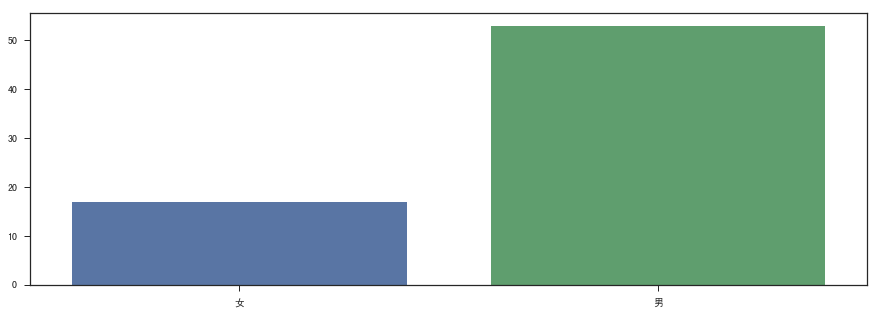


统计类型：毕业专业名称 
类型数：2
统计个数排序:[('电气工程及其自动化', 47), ('自动化', 23)]


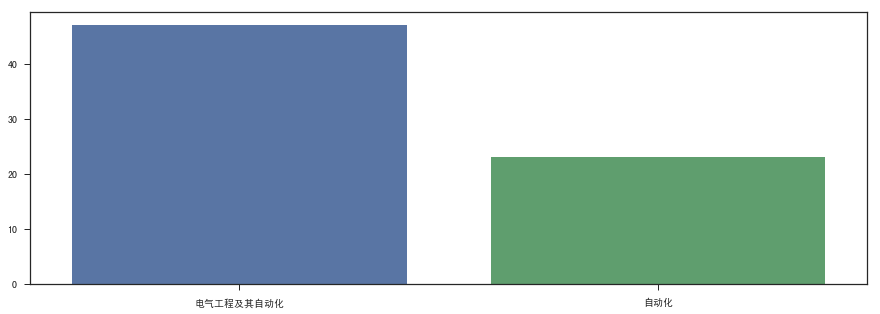


统计类型：录取学校名称 
类型数：15
统计个数排序:[('华中科技大学', 31), ('武汉理工大学', 9), ('湖南大学', 8), ('浙江大学', 4), ('中南大学', 4), ('华南理工大学', 3), ('武汉大学', 2), ('中国科学院大学', 2), ('西安交通大学', 1), ('航天科工集团三院8358所', 1), ('电子科技大学', 1), ('山东大学', 1), ('合肥工业大学', 1), ('北京理工大学', 1), ('上海科技大学', 1)]


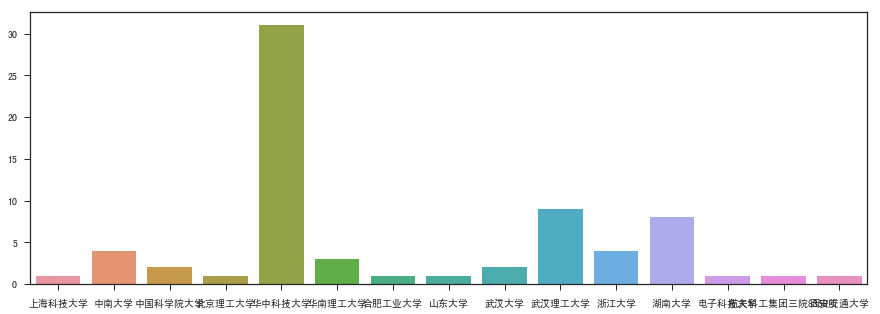


统计类型：招生类型 
类型数：2
统计个数排序:[('硕士', 67), ('直博生', 3)]


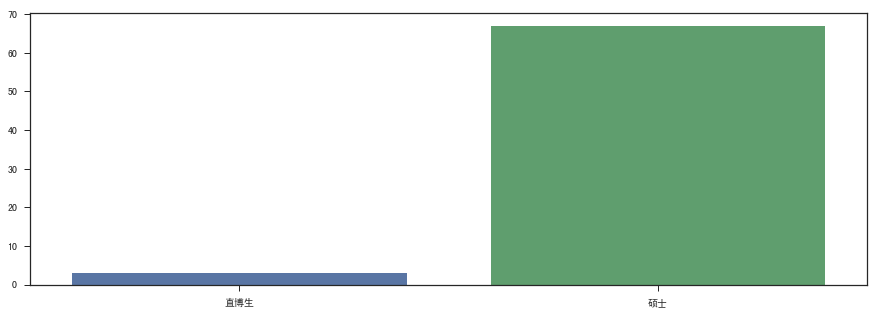


统计类型：电子邮箱 
类型数：6
统计个数排序:[('qq', 60), ('163', 6), ('whut', 1), ('vip', 1), ('outlook', 1), ('126', 1)]


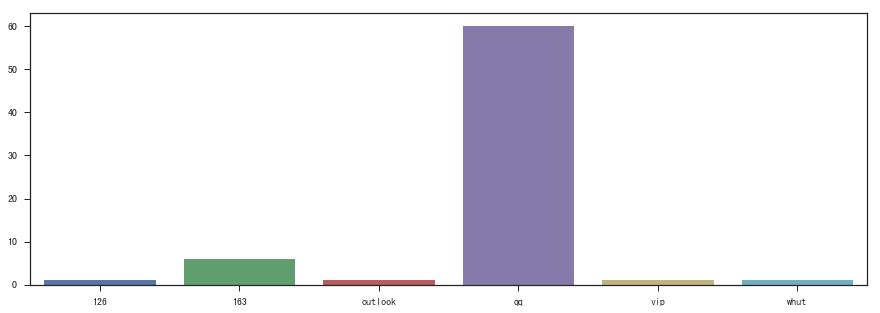

In [3]:
college = '自动化学院'
plot_cat(df, '性别', '本科学院名称', college)
plot_cat(df, '毕业专业名称','本科学院名称', college)
plot_cat(df, '录取学校名称','本科学院名称', college)
plot_cat(df, '招生类型','本科学院名称', college)
plot_cat(df, '电子邮箱','本科学院名称', college)

## 2. 全校在性别，专业，录取学校，硕博类型，邮箱类型上的区别。

统计类型：性别 
类型数：2
统计个数排序:[('男', 727), ('女', 515)]


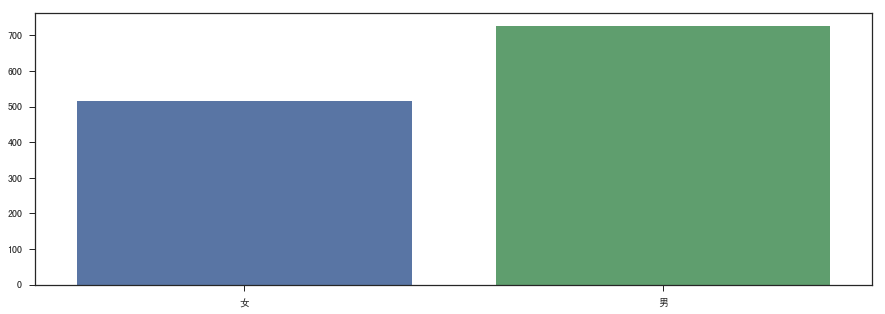


统计类型：毕业专业名称 
类型数：85
统计个数排序:[('材料科学与工程', 76), ('机械工程', 72), ('船舶与海洋工程', 51), ('通信工程', 51), ('车辆工程', 50), ('轮机工程', 47), ('电气工程及其自动化', 47), ('金融学', 37), ('土木工程', 33), ('能源与动力工程', 32), ('机械设计制造及其自动化', 30), ('软件工程', 29), ('电子信息工程', 28), ('航海技术', 26), ('会计学', 25), ('光电信息科学与工程', 24), ('信息与计算科学', 24), ('自动化', 23), ('测控技术与仪器', 22), ('财务管理', 21), ('计算机科学与技术', 19), ('广告学', 15), ('信息管理与信息系统', 14), ('材料成型及控制工程', 14), ('英语', 14), ('法学', 13), ('化学工程与工艺', 13), ('道路桥梁与渡河工程', 13), ('矿物加工工程', 12), ('制药工程', 12), ('统计学', 12), ('产品设计', 12), ('物流管理', 12), ('物流工程', 12), ('工商管理', 11), ('信息工程', 11), ('高分子材料与工程', 10), ('汽车服务工程', 10), ('环境工程', 10), ('复合材料与工程', 9), ('工程管理', 9), ('给排水科学与工程', 8), ('社会工作', 8), ('交通运输', 8), ('电子科学与技术', 8), ('物联网工程', 8), ('地理信息科学', 8), ('人力资源管理', 8), ('过程装备与控制工程', 8), ('经济学', 8), ('市场营销', 8), ('工业设计', 7), ('电子信息科学与技术', 7), ('交通工程', 7), ('思想政治教育', 7), ('无机非金属材料工程', 7), ('环境设计', 7), ('建筑学', 6), ('应用化学', 6), ('工程力学', 6), ('工业工程', 6), ('油气储运工程', 6), ('教育技术学', 5), ('新能源材料与器件', 5), ('公共事业管理

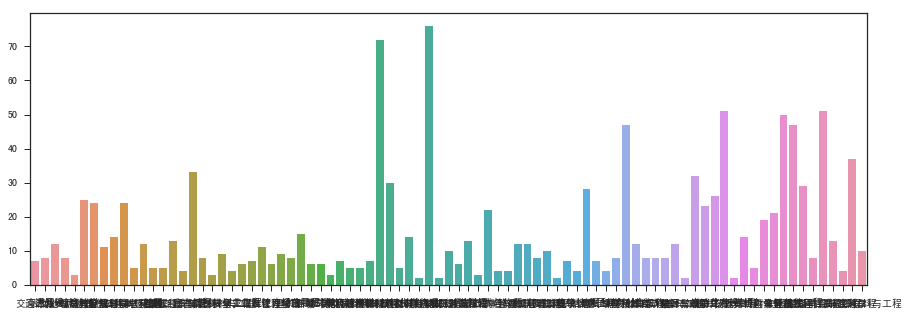


统计类型：录取学校名称 
类型数：65
统计个数排序:[('武汉理工大学', 331), ('华中科技大学', 236), ('武汉大学', 68), ('华南理工大学', 42), ('湖南大学', 42), ('浙江大学', 40), ('中南大学', 35), ('中国科学院大学', 34), ('上海交通大学', 33), ('东南大学', 32), ('西安交通大学', 26), ('中国科学技术大学', 21), ('重庆大学', 18), ('天津大学', 16), ('北京理工大学', 16), ('北京航空航天大学', 16), ('哈尔滨工业大学', 16), ('同济大学', 15), ('厦门大学', 12), ('中南财经政法大学', 12), ('大连理工大学', 11), ('清华大学', 11), ('电子科技大学', 9), ('南京大学', 8), ('四川大学', 8), ('吉林大学', 8), ('北京大学', 8), ('复旦大学', 8), ('华中师范大学', 7), ('上海财经大学', 7), ('中国人民大学', 7), ('华东师范大学', 7), ('西南财经大学', 6), ('中山大学', 6), ('北京交通大学', 6), ('上海大学', 5), ('暨南大学', 5), ('山东大学', 5), ('南开大学', 5), ('北京邮电大学', 4), ('上海科技大学', 4), ('中央财经大学', 3), ('中国政法大学', 3), ('西南交通大学', 3), ('东北大学', 2), ('西北工业大学', 2), ('火箭军工程大学', 2), ('空军工程大学', 2), ('江南大学', 2), ('北京师范大学', 2), ('哈尔滨工程大学', 1), ('商务部国际贸易经济合作研究院', 1), ('国防科技大学', 1), ('上海外国语大学', 1), ('苏州大学', 1), ('中国海洋大学', 1), ('航天科工集团三院8358所', 1), ('广东外语外贸大学', 1), ('信息工程大学', 1), ('合肥工业大学', 1), ('西安电子科技大学', 1), ('南京理工大学', 1), ('南京师范大学', 1), ('华东理工大学', 1), ('对

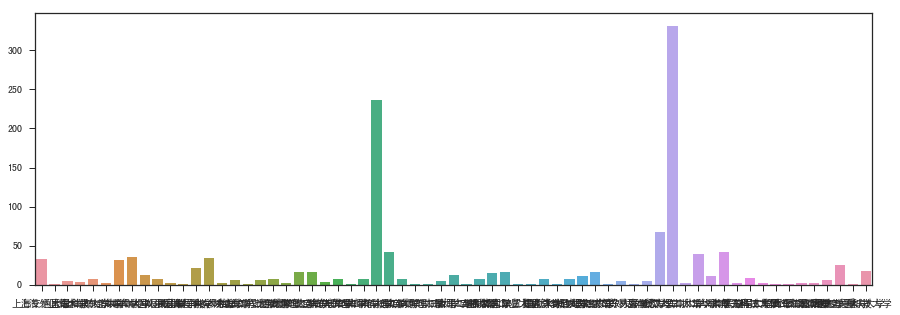


统计类型：本科学院名称 
类型数：20
统计个数排序:[('材料科学与工程学院', 128), ('机电工程学院', 113), ('信息工程学院', 98), ('管理学院', 92), ('交通学院', 83), ('理学院', 73), ('汽车工程学院', 73), ('能源与动力工程学院', 72), ('自动化学院', 70), ('土木工程与建筑学院', 62), ('计算机科学与技术学院', 56), ('物流工程学院', 54), ('经济学院', 53), ('资源与环境工程学院', 43), ('艺术与设计学院', 38), ('文法学院', 35), ('化学化工与生命科学学院', 35), ('航运学院', 30), ('政治与行政学院', 17), ('外国语学院', 17)]


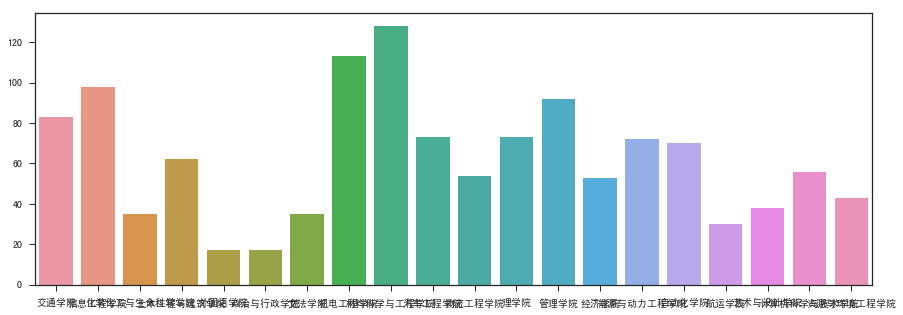


统计类型：招生类型 
类型数：2
统计个数排序:[('硕士', 1151), ('直博生', 91)]


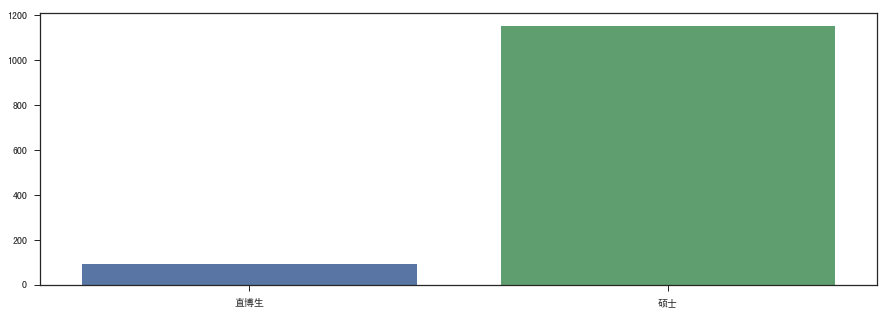


统计类型：电子邮箱 
类型数：15
统计个数排序:[('qq', 975), ('163', 181), ('whut', 42), ('126', 18), ('vip', 5), ('foxmail', 5), ('outlook', 4), ('hotmail', 4), ('gmail', 2), ('yahoo', 1), ('wutnews', 1), ('sohu', 1), ('sina', 1), ('189', 1), ('139', 1)]


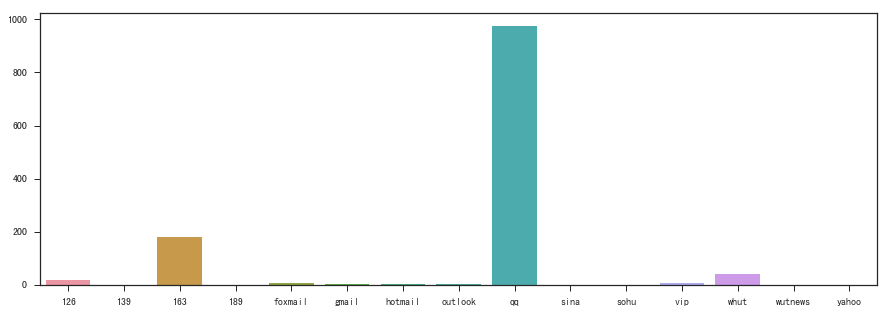

In [4]:
plot_cat(df, '性别')
plot_cat(df, '毕业专业名称')
plot_cat(df, '录取学校名称')
plot_cat(df, '本科学院名称')
plot_cat(df, '招生类型')
plot_cat(df, '电子邮箱')

在定义一个函数进行 group box 统计。

In [9]:
def plot_contra(dataframe, attri1, attri2, topk = 10, pre_defined_type = None, rev = False):
    plt.figure(figsize=(15,5))
    print("平均{}排名：".format(map_list[attri2]))
    types = np.unique(dataframe[attri1])
    num_type = len(types)
    stat_num = []
    for i in range(num_type):
        stat_num.append(dataframe[dataframe[attri1] == types[i]].shape[0])
    order = np.argsort(stat_num)[::-1]
    topk_type = types[order][:topk]
    
    dataframe_temp = []
    for i in range(topk):
        dataframe_temp.append(dataframe[dataframe[attri1] == topk_type[i]])
    if pre_defined_type is not None:
        for i in range(len(pre_defined_type)):
            dataframe_temp.append(dataframe[dataframe[attri1] == pre_defined_type[i]])
    dataframe_temp = pd.concat(dataframe_temp)
    stats = dataframe_temp.groupby(attri1)[attri2].mean()
    stats_num = dataframe_temp.groupby(attri1)[attri2].count().rename('count')
    if rev:
        print(pd.concat([stats, stats_num], axis=1).sort_values(attri2)[::-1])
    else:
        print(pd.concat([stats, stats_num], axis=1).sort_values(attri2))
    sns.boxplot(x = attri1, y = attri2, data = dataframe_temp)
    plt.show()

## 3. 全校分别根据录取学校的不同，综测，排名，GPA上的区别。

平均综测总分排名：
             tjzhcj  count
录取学校名称                    
清华大学      99.406364     11
浙江大学      98.396000     40
北京大学      97.448750      8
同济大学      97.050667     15
北京航空航天大学  96.088125     16
中南财经政法大学  95.825833     12
东南大学      94.788438     32
北京理工大学    94.746250     16
上海交通大学    94.599697     33
武汉大学      94.468676     68
中国科学技术大学  93.944286     21
华中科技大学    93.811314    236
中国科学院大学   93.147941     34
天津大学      92.849375     16
西安交通大学    92.700769     26
中南大学      92.519714     35
哈尔滨工业大学   92.393750     16
重庆大学      91.314444     18
厦门大学      91.155000     12
湖南大学      90.968571     42
华南理工大学    90.111667     42
武汉理工大学    89.004592    331


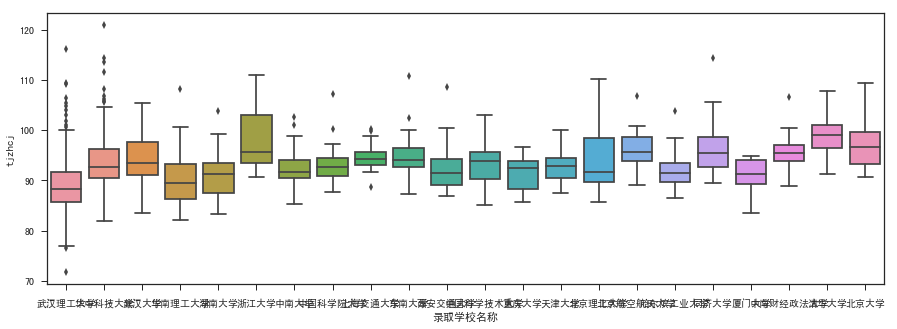

平均年级排名排名：
              tjzhmc  count
录取学校名称                     
清华大学        8.727273     11
上海交通大学     11.757576     33
同济大学       17.266667     15
中国科学技术大学   20.095238     21
浙江大学       24.500000     40
哈尔滨工业大学    34.062500     16
中南财经政法大学   36.583333     12
北京大学       39.000000      8
东南大学       41.218750     32
中南大学       44.000000     35
北京航空航天大学   49.312500     16
天津大学       57.250000     16
重庆大学       59.722222     18
厦门大学       63.083333     12
武汉大学       64.529412     68
华中科技大学     64.665254    236
北京理工大学     66.750000     16
中国科学院大学    75.705882     34
西安交通大学     84.692308     26
武汉理工大学     87.000000    331
湖南大学      101.095238     42
华南理工大学    104.095238     42


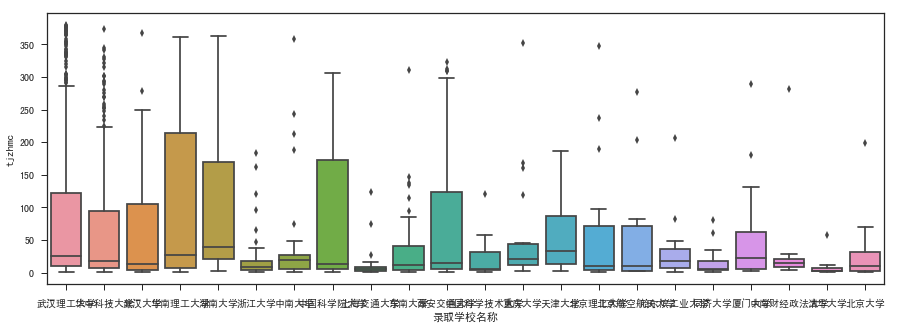

平均GPA排名：
             tjgpa  count
录取学校名称                   
清华大学      4.132727     11
北京大学      4.062500      8
上海交通大学    3.993030     33
中南财经政法大学  3.953333     12
浙江大学      3.948500     40
东南大学      3.934375     32
同济大学      3.925333     15
中国科学技术大学  3.855238     21
武汉大学      3.795882     68
哈尔滨工业大学   3.795000     16
中国科学院大学   3.786176     34
中南大学      3.774857     35
厦门大学      3.735833     12
华中科技大学    3.727458    236
重庆大学      3.692222     18
天津大学      3.669375     16
湖南大学      3.655952     42
北京航空航天大学  3.651875     16
北京理工大学    3.651250     16
西安交通大学    3.647308     26
华南理工大学    3.552619     42
武汉理工大学    3.533897    331


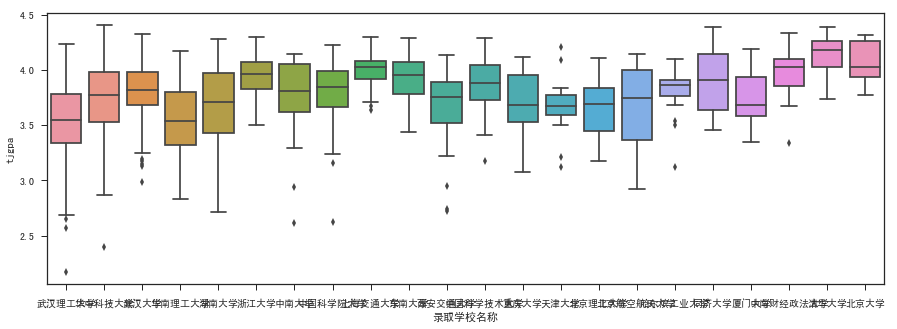

In [10]:
map_list = {'tjzhcj': '综测总分',
            'tjzhmc': '年级排名',
            'tjgpa': 'GPA'}
plot_contra(df, '录取学校名称', 'tjzhcj', 20, ['清华大学', '北京大学'], True)
plot_contra(df, '录取学校名称', 'tjzhmc', 20, ['清华大学', '北京大学'])
plot_contra(df, '录取学校名称', 'tjgpa', 20, ['清华大学', '北京大学'], True)

## 4. 全校分别根据学院的不同，综测，排名，GPA上的区别。

平均综测总分排名：
                tjzhcj  count
本科学院名称                       
自动化学院        95.395000     70
文法学院         95.328000     35
艺术与设计学院      95.129737     38
外国语学院        93.661176     17
管理学院         93.350652     92
汽车工程学院       93.337945     73
理学院          93.125205     73
信息工程学院       93.004796     98
能源与动力工程学院    92.501389     72
经济学院         92.375283     53
政治与行政学院      92.304706     17
物流工程学院       92.185185     54
土木工程与建筑学院    92.115484     62
化学化工与生命科学学院  92.107714     35
交通学院         91.523373     83
机电工程学院       91.184425    113
材料科学与工程学院    91.003672    128
航运学院         90.999333     30
计算机科学与技术学院   90.776964     56
资源与环境工程学院    89.930000     43


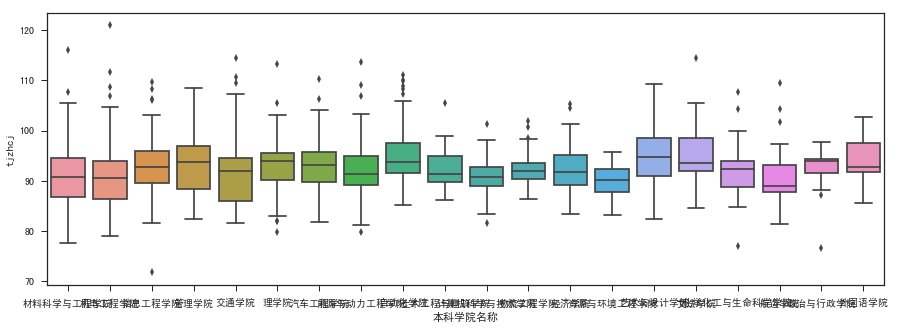

平均年级排名排名：
                 tjzhmc  count
本科学院名称                        
外国语学院         26.176471     17
交通学院          39.180723     83
土木工程与建筑学院     42.693548     62
化学化工与生命科学学院   51.057143     35
机电工程学院        52.469027    113
材料科学与工程学院     53.117188    128
航运学院          54.966667     30
经济学院          55.320755     53
艺术与设计学院       59.526316     38
政治与行政学院       67.117647     17
自动化学院         70.771429     70
信息工程学院        75.622449     98
文法学院          75.914286     35
计算机科学与技术学院    77.178571     56
理学院           80.205479     73
汽车工程学院        81.191781     73
能源与动力工程学院     83.347222     72
物流工程学院        87.851852     54
管理学院          94.293478     92
资源与环境工程学院    109.255814     43


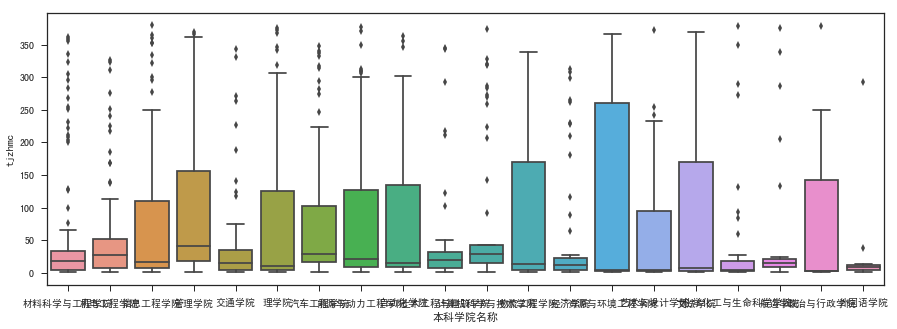

平均GPA排名：
                tjgpa  count
本科学院名称                      
外国语学院        4.044706     17
文法学院         3.888571     35
政治与行政学院      3.818824     17
自动化学院        3.764714     70
经济学院         3.751698     53
土木工程与建筑学院    3.747581     62
艺术与设计学院      3.740000     38
计算机科学与技术学院   3.735179     56
汽车工程学院       3.733836     73
交通学院         3.733253     83
信息工程学院       3.729694     98
材料科学与工程学院    3.714141    128
化学化工与生命科学学院  3.710000     35
理学院          3.702055     73
管理学院         3.699891     92
资源与环境工程学院    3.660233     43
机电工程学院       3.635929    113
物流工程学院       3.622778     54
航运学院         3.608333     30
能源与动力工程学院    3.547222     72


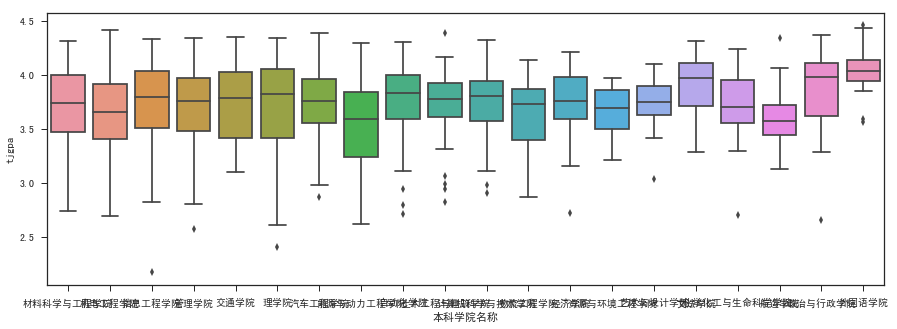

In [15]:
plot_contra(df, '本科学院名称', 'tjzhcj', 20, [], True)
plot_contra(df, '本科学院名称', 'tjzhmc', 20, [])
plot_contra(df, '本科学院名称', 'tjgpa', 20, [], True)